# <span style="color:blue">Lab Case Study - Auto Insurance Company</span>

 #### Table of contents
 
 * [Import and concatenate files](#chapter1)
  
  * [Standardizing header names](#chapter2)
  
  * [Deleting rows](#chapter3)
  
  * [Check the data types](#chapter4)
  
  * [Filtering data and Correcting typos](#chapter5)
  
  * [Removing duplicates](#chapter6)
  
  * [Replacing null values](#chapter7)
  
      * [Customer lifetime value](#chapter7_1)
      * [Income](#chapter7_2)
      * [Monthly premium auto](#chapter7_3)
      * [Number of open complaints](#chapter7_4)
      
  * [Bucketing the data](#chapter8)
  * [Standardizing the data](#chapter9)

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Import and concatenate files  <a class="anchor" id="chapter1"></a>

In [44]:
file1 = pd.read_csv('Data/file1.csv')
file2 = pd.read_csv('Data/file2.csv')
file3a = pd.read_csv('Data/file3.csv')

In [45]:
file3=file3a.rename(columns={'State':'ST', 'Gender':'GENDER'})

file3  #renaming column  headers in file3

#data['Gender'] = list(map(lambda x, y: x if x == x else y, data['Gender'],data['GENDER']))

,Customer,ST,Customer Lifetime Value,Education,GENDER,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Total Claim Amount,Vehicle Class
0,SA25987,Washington,3479.137523,High School or Below,M,0,104,0,Personal Auto,499.200000,Two-Door Car
1,TB86706,Arizona,2502.637401,Master,M,0,66,0,Personal Auto,3.468912,Two-Door Car
2,ZL73902,Nevada,3265.156348,Bachelor,F,25820,82,0,Personal Auto,393.600000,Four-Door Car
3,KX23516,California,4455.843406,High School or Below,F,0,121,0,Personal Auto,699.615192,SUV
4,FN77294,California,7704.958480,High School or Below,M,30366,101,2,Personal Auto,484.800000,SUV
...,...,...,...,...,...,...,...,...,...,...,...
7065,LA72316,California,23405.987980,Bachelor,M,71941,73,0,Personal Auto,198.234764,Four-Door Car
7066,PK87824,California,3096.511217,College,F,21604,79,0,Corporate Auto,379.200000,Four-Door Car
7067,TD14365,California,8163.890428,Bachelor,M,0,85,3,Corporate Auto,790.784983,Four-Door Car
7068,UP19263,California,7524.442436,College,M,21941,96,0,Personal Auto,691.200000,Four-Door Car


In [46]:
ai_df = pd.concat([file1,file2,file3], axis=0)  #concatinating file1 + file2 +file3
ai_df_=ai_df.reset_index(drop=True)
ai_df_

,Customer,ST,GENDER,Education,Customer Lifetime Value,Income,Monthly Premium Auto,Number of Open Complaints,Policy Type,Vehicle Class,Total Claim Amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Standardizing header names <a class="anchor" id="chapter2"></a>

In [47]:
def lower_case_column_names(ai_df_):          #function to lower column headers
    ai_df_.columns=[i.lower() for i in ai_df_.columns]
    return ai_df_

In [48]:
lower_case_column_names(ai_df_)

,customer,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,RB50392,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,QZ44356,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,AI49188,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,WW63253,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,GA49547,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,LA72316,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,PK87824,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,TD14365,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,UP19263,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Deleting rows (customer) <a class="anchor" id="chapter3"></a>

In [49]:
def drop_columns(ai_df_) :                  #funtion to drop customer column
    ai_df_.drop(columns=['customer'], inplace=True)
    return ai_df_

In [50]:
drop_columns(ai_df_)

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,1/0/00,Personal Auto,Four-Door Car,2.704934
1,Arizona,F,Bachelor,697953.59%,0.0,94.0,1/0/00,Personal Auto,Four-Door Car,1131.464935
2,Nevada,F,Bachelor,1288743.17%,48767.0,108.0,1/0/00,Personal Auto,Two-Door Car,566.472247
3,California,M,Bachelor,764586.18%,0.0,106.0,1/0/00,Corporate Auto,SUV,529.881344
4,Washington,M,High School or Below,536307.65%,36357.0,68.0,1/0/00,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,M,Bachelor,23405.98798,71941.0,73.0,0,Personal Auto,Four-Door Car,198.234764
12070,California,F,College,3096.511217,21604.0,79.0,0,Corporate Auto,Four-Door Car,379.200000
12071,California,M,Bachelor,8163.890428,0.0,85.0,3,Corporate Auto,Four-Door Car,790.784983
12072,California,M,College,7524.442436,21941.0,96.0,0,Personal Auto,Four-Door Car,691.200000


## Check the data types<a class="anchor" id="chapter4"></a>
    fix customer lifetime value and number of complaints

In [51]:
ai_df_.dtypes   #see all data types

st                            object
gender                        object
education                     object
customer lifetime value       object
income                       float64
monthly premium auto         float64
number of open complaints     object
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

In [52]:
ai_df_['customer lifetime value'] =  pd.to_numeric(ai_df_['customer lifetime value'], errors='coerce')  #set customer lifetime value to numeric
ai_df_['number of open complaints'] =  pd.to_numeric(ai_df_['number of open complaints'], errors='coerce')   #set number of open complaints to numeric

In [53]:
ai_df_.dtypes #check if all applied

st                            object
gender                        object
education                     object
customer lifetime value      float64
income                       float64
monthly premium auto         float64
number of open complaints    float64
policy type                   object
vehicle class                 object
total claim amount           float64
dtype: object

## Filtering data and Correcting typos<a class="anchor" id="chapter5"></a>
        filter the data in state and gender column to standardize the texts in those columns

In [54]:
print(ai_df_['gender'].unique())   #check for all unique values in gender
ai_df_.gender.value_counts()

[nan 'F' 'M' 'Femal' 'Male' 'female']


F         4560
M         4368
Male        40
female      30
Femal       17
Name: gender, dtype: int64

In [55]:
#ai_df_['gender'].replace(['M', 'MALE'], 'Male') #inplace=True  #attempt to try with replace-function
#ai_df_

In [56]:
def clean_gender(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['M', 'MALE', 'Male' ]:
        return 'Male'
    elif x.lower().startswith('f'):
        return 'Female'
    else:
        return 'Unkown'
    

In [57]:
ai_df_['gender'] = list(map(clean_gender, ai_df_['gender'])) 

In [58]:
print(ai_df_['gender'].unique())
ai_df_.gender.value_counts()

[nan 'Female' 'Male']


Female    4607
Male      4408
Name: gender, dtype: int64

In [59]:
ai_df_

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


In [60]:
print(ai_df_['st'].unique())  #check values for state
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' 'Cali' 'AZ' 'WA'
 nan]


California    3032
Oregon        2601
Arizona       1630
Nevada         882
Washington     768
Cali           120
AZ              74
WA              30
Name: st, dtype: int64

In [61]:
def clean_st(x):
    if x !=x:
        return x
    elif x in ['Cali', 'California']:
        return 'California'
    elif x in ['Arizona', 'AZ']:
        return 'Arizona'
    elif x in ['Washington', 'WA']:
        return 'Washington'
    
    else:
        return x

In [62]:
ai_df_['st'] = list(map(clean_st, ai_df_['st']))   #clean/correct st values

In [63]:
print(ai_df_['st'].unique())     #check st values again
ai_df_.st.value_counts()

['Washington' 'Arizona' 'Nevada' 'California' 'Oregon' nan]


California    3152
Oregon        2601
Arizona       1704
Nevada         882
Washington     798
Name: st, dtype: int64

## Removing duplicates<a class="anchor" id="chapter6"></a>

In [64]:
ai_df_.drop_duplicates()

,st,gender,education,customer lifetime value,income,monthly premium auto,number of open complaints,policy type,vehicle class,total claim amount
0,Washington,NaN,Master,NaN,0.0,1000.0,NaN,Personal Auto,Four-Door Car,2.704934
1,Arizona,Female,Bachelor,NaN,0.0,94.0,NaN,Personal Auto,Four-Door Car,1131.464935
2,Nevada,Female,Bachelor,NaN,48767.0,108.0,NaN,Personal Auto,Two-Door Car,566.472247
3,California,Male,Bachelor,NaN,0.0,106.0,NaN,Corporate Auto,SUV,529.881344
4,Washington,Male,High School or Below,NaN,36357.0,68.0,NaN,Personal Auto,Four-Door Car,17.269323
...,...,...,...,...,...,...,...,...,...,...
12069,California,Male,Bachelor,23405.987980,71941.0,73.0,0.0,Personal Auto,Four-Door Car,198.234764
12070,California,Female,College,3096.511217,21604.0,79.0,0.0,Corporate Auto,Four-Door Car,379.200000
12071,California,Male,Bachelor,8163.890428,0.0,85.0,3.0,Corporate Auto,Four-Door Car,790.784983
12072,California,Male,College,7524.442436,21941.0,96.0,0.0,Personal Auto,Four-Door Car,691.200000


## Replacing null values <a class="anchor" id="chapter7"></a>
    Replace missing values with means of the column (for numerical columns)

### Customer lifetime value <a class="anchor" id="chapter7_1"></a>

[        nan 3479.137523 2502.637401 ... 8163.890428 7524.442436
 2611.836866]
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 8028.803803165787


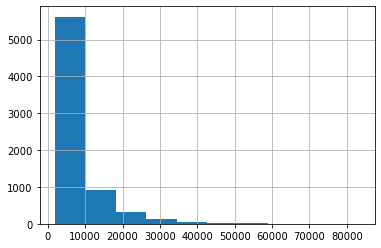

In [65]:
print(ai_df_['customer lifetime value'].unique())
print(ai_df_['customer lifetime value'].hist())

mean_customer_lifetime_value = np.mean(ai_df_['customer lifetime value'])

print('mean:',mean_customer_lifetime_value)

AxesSubplot(0.125,0.125;0.775x0.755)


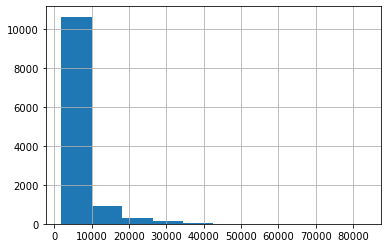

In [66]:
ai_df_['customer lifetime value'] = ai_df_['customer lifetime value'].fillna(mean_customer_lifetime_value)  #fillna (fill NaN) with mean

print(ai_df_['customer lifetime value'].hist())


### Income <a class="anchor" id="chapter7_2"></a>

[    0. 48767. 36357. ... 66367. 71941. 21941.]
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 37828.820291124


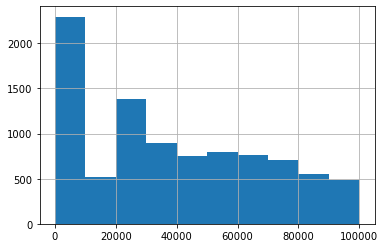

In [67]:
print(ai_df_['income'].unique())
print(ai_df_['income'].hist())

mean_income = np.mean(ai_df_['income'])

print('mean:', mean_income)

AxesSubplot(0.125,0.125;0.775x0.755)


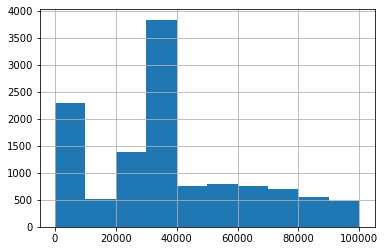

In [68]:
ai_df_['income'] = ai_df_['income'].fillna(mean_income)

print(ai_df_['income'].hist())

### Monthly premium auto <a class="anchor" id="chapter7_3"></a>

[ 1000.    94.   108.   106.    68.    69.    67.   101.    71.    93.
   110.    70.    64.    72.    74.    79.    73.    61.   111.    80.
    63.   237.    65.   130.    62.   117.    91.    90.    66.    99.
   103. 35354.   172.    92.   104.   113.   124.   105.   100.   112.
    97.    95.   102.    96.   186.    77.    76.   119.    87.   109.
   107.    88.    85.  6464.   133.    86.    78.    89.   192.   118.
   140.   127.   126.    82.   115.   217.   114.   138.    81.   255.
   150.   123.   116.   190.    98.   159.    84.    83.   152.   136.
   245.   135.  1005.   225.   132.   153.   121.   139.   154.   161.
   156.   171.   244.   183.   176.   230.   129.   177.   181.   196.
   131.   276.   253.   137.   180.   203.   147.   165.   198.   125.
   193.   128.   271.   142. 10202.   206.   182.   189.   160.   295.
   210.   134. 35353.   239.   188.   256.   173.   285.   148.   141.
   197.   199.    nan   214.   175.   167.   194.   164.   222.   215.
   283

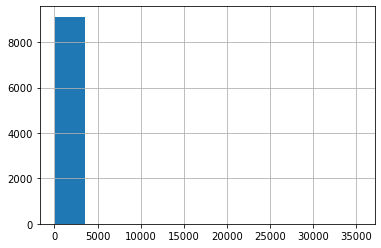

In [69]:
print(ai_df_['monthly premium auto'].unique()) 
print(ai_df_['monthly premium auto'].hist())    #outlier: 35353.0

mean_monthly_premium_auto = np.mean(ai_df_['monthly premium auto'])

print('mean:', mean_monthly_premium_auto)

AxesSubplot(0.125,0.125;0.775x0.755)


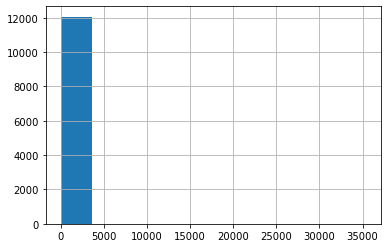

In [70]:
ai_df_['monthly premium auto'] = ai_df_['monthly premium auto'].fillna(mean_monthly_premium_auto)

print(ai_df_['monthly premium auto'].hist())

### Number of open complaints <a class="anchor" id="chapter7_4"></a>

[nan  0.  2.  3.  1.  5.  4.]
AxesSubplot(0.125,0.125;0.775x0.755)
mean: 0.384


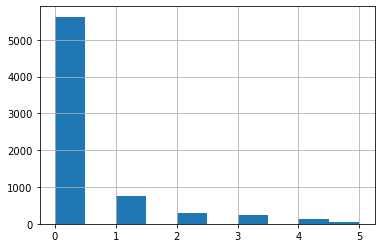

In [71]:
print(ai_df_['number of open complaints'].unique())
print(ai_df_['number of open complaints'].hist())

mean_number_of_open_complaints = round(np.mean(ai_df_['number of open complaints']), 3)
print('mean:',mean_number_of_open_complaints)

[0.384 0.    2.    3.    1.    5.    4.   ]
AxesSubplot(0.125,0.125;0.775x0.755)


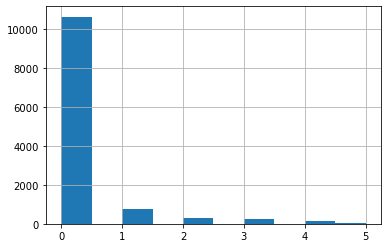

In [72]:
ai_df_['number of open complaints'] = ai_df_['number of open complaints'].fillna(mean_number_of_open_complaints)

print(ai_df_['number of open complaints'].unique())
print(ai_df_['number of open complaints'].hist())

In [73]:
print(ai_df_['total claim amount'].unique())

mean_total_claim_amount = np.mean(ai_df_['total claim amount'])
ai_df_['total claim amount'] = ai_df_['total claim amount'].fillna(mean_monthly_premium_auto)

[   2.704934 1131.464935  566.472247 ...  541.282007  198.234764
  790.784983]


In [74]:
ai_df_.isna().sum()   #check for number of NaN values

st                           2937
gender                       3059
education                    2937
customer lifetime value         0
income                          0
monthly premium auto            0
number of open complaints       0
policy type                  2937
vehicle class                2937
total claim amount              0
dtype: int64

In [75]:
ai_df_.describe()

,customer lifetime value,income,monthly premium auto,number of open complaints,total claim amount
count,12074.000000,12074.000000,12074.000000,12074.000000,12074.000000
mean,8028.803803,37828.820291,110.391266,0.384176,352.654102
std,5312.295534,26409.114946,505.740308,0.700656,286.924004
min,1898.007675,0.000000,61.000000,0.000000,0.099007
25%,5279.143178,21585.250000,71.000000,0.000000,110.391266
50%,8028.803803,37828.820291,101.000000,0.384000,312.000000
75%,8028.803803,53301.750000,110.391266,0.384000,494.345486
max,83325.381190,99981.000000,35354.000000,5.000000,2893.239678


## Bucketing the data<a class="anchor" id="chapter8"></a>
    Write a function to replace column "State" to different zones. California as West Region, Oregon as North West, and Washington as East, and Arizona and Nevada as Central

<AxesSubplot:>

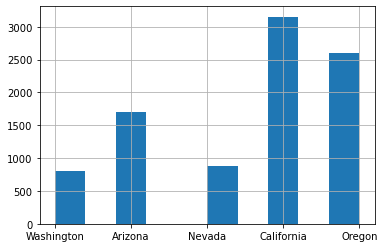

In [76]:
ai_df_.st.hist() 

In [77]:
def bucket_st(x):
    if x !=x:                #for NaN values
        return x
    elif x in ['California', 'West Region']:
        return 'West Region'
    elif x in ['Oregon', 'North West']:
        return 'North West'
    elif x in ['Washington', 'East']:
        return 'East'
    elif x in ['Arizona','Nevada', 'Central']:
        return 'Central'
    else:
        return 'Other'
    

In [78]:
ai_df_['st binned'] = ai_df_['st'].apply(bucket_st)  #apply function on data 'st' to group into 'st binned' (new column)


# sort columns
ai_df_=ai_df_[['st', 'st binned','gender', 'education', 'income', 'policy type', 'vehicle class','customer lifetime value', 'monthly premium auto', 'number of open complaints', 'total claim amount']]
ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,Washington,East,NaN,Master,0.0,Personal Auto,Four-Door Car,8028.803803,1000.0,0.384,2.704934
1,Arizona,Central,Female,Bachelor,0.0,Personal Auto,Four-Door Car,8028.803803,94.0,0.384,1131.464935
2,Nevada,Central,Female,Bachelor,48767.0,Personal Auto,Two-Door Car,8028.803803,108.0,0.384,566.472247
3,California,West Region,Male,Bachelor,0.0,Corporate Auto,SUV,8028.803803,106.0,0.384,529.881344
4,Washington,East,Male,High School or Below,36357.0,Personal Auto,Four-Door Car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,California,West Region,Male,Bachelor,71941.0,Personal Auto,Four-Door Car,23405.987980,73.0,0.000,198.234764
12070,California,West Region,Female,College,21604.0,Corporate Auto,Four-Door Car,3096.511217,79.0,0.000,379.200000
12071,California,West Region,Male,Bachelor,0.0,Corporate Auto,Four-Door Car,8163.890428,85.0,3.000,790.784983
12072,California,West Region,Male,College,21941.0,Personal Auto,Four-Door Car,7524.442436,96.0,0.000,691.200000


## Standardizing the data<a class="anchor" id="chapter9"></a>
    Use string functions to standardize the text data (lower case)

In [79]:
ai_df_.dtypes  ##checking which data types are strings

st                            object
st binned                     object
gender                        object
education                     object
income                       float64
policy type                   object
vehicle class                 object
customer lifetime value      float64
monthly premium auto         float64
number of open complaints    float64
total claim amount           float64
dtype: object

In [80]:
##setting all string data columns lower case

for col in ['st', 'st binned', 'gender','education', 'policy type', 'vehicle class']:
    ai_df_[col]=ai_df_[col].str.lower()


#ai_df_['st']=ai_df_['st'].str.lower()
#ai_df_['st binned'].str.lower().inplace=True
#ai_df_['gender'].str.lower()
#ai_df_['education'].str.lower()
#ai_df_['policy type'].str.lower()
#ai_df_['vehicle class'].str.lower()

ai_df_

,st,st binned,gender,education,income,policy type,vehicle class,customer lifetime value,monthly premium auto,number of open complaints,total claim amount
0,washington,east,NaN,master,0.0,personal auto,four-door car,8028.803803,1000.0,0.384,2.704934
1,arizona,central,female,bachelor,0.0,personal auto,four-door car,8028.803803,94.0,0.384,1131.464935
2,nevada,central,female,bachelor,48767.0,personal auto,two-door car,8028.803803,108.0,0.384,566.472247
3,california,west region,male,bachelor,0.0,corporate auto,suv,8028.803803,106.0,0.384,529.881344
4,washington,east,male,high school or below,36357.0,personal auto,four-door car,8028.803803,68.0,0.384,17.269323
...,...,...,...,...,...,...,...,...,...,...,...
12069,california,west region,male,bachelor,71941.0,personal auto,four-door car,23405.987980,73.0,0.000,198.234764
12070,california,west region,female,college,21604.0,corporate auto,four-door car,3096.511217,79.0,0.000,379.200000
12071,california,west region,male,bachelor,0.0,corporate auto,four-door car,8163.890428,85.0,3.000,790.784983
12072,california,west region,male,college,21941.0,personal auto,four-door car,7524.442436,96.0,0.000,691.200000
